In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [3]:
# Data preprocessing and augmentation
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [4]:
from tensorflow.keras.optimizers import Adam
# Model configuration

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), input_shape=(150, 150, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(21, activation='softmax')
  ])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [5]:
# Image data generators for training and validation
train_generator = datagen.flow_from_directory(
    "/content/drive/My Drive/Capstone's Project/final_datasets/training",
    target_size = (150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    "/content/drive/My Drive/Capstone's Project/final_datasets/validation",
    target_size = (150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Print some information about the training generator
print("Number of batches in the training generator:", len(train_generator))
print("Number of samples in the training generator:", len(train_generator.filenames))
print("Number of batches in the validation generator:", len(validation_generator))
print("Number of samples in the validation generator:", len(validation_generator.filenames))

Found 17952 images belonging to 21 classes.
Found 5739 images belonging to 21 classes.
Number of batches in the training generator: 561
Number of samples in the training generator: 17952
Number of batches in the validation generator: 180
Number of samples in the validation generator: 5739


In [6]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.87 and logs.get('val_accuracy')) > 0.87:
            self.model.stop_training = True
# Model training
model = model
history = model.fit(train_generator,
          epochs=25,
          verbose=1,
          validation_data=validation_generator,
          callbacks=[myCallback()])


Epoch 1/25
561/561 [==============================] - 5911s 11s/step - loss: 1.3032 - accuracy: 0.5633 - val_loss: 1.2543 - val_accuracy: 0.7487
Epoch 2/25
561/561 [==============================] - 197s 352ms/step - loss: 0.5607 - accuracy: 0.8080 - val_loss: 1.5418 - val_accuracy: 0.8090
Epoch 3/25
561/561 [==============================] - 199s 354ms/step - loss: 0.4044 - accuracy: 0.8661 - val_loss: 1.6673 - val_accuracy: 0.8486
Epoch 4/25
561/561 [==============================] - 192s 343ms/step - loss: 0.3506 - accuracy: 0.8852 - val_loss: 1.5581 - val_accuracy: 0.8613
Epoch 5/25
561/561 [==============================] - 195s 348ms/step - loss: 0.2846 - accuracy: 0.9066 - val_loss: 1.4374 - val_accuracy: 0.8691
Epoch 6/25
561/561 [==============================] - 191s 340ms/step - loss: 0.2318 - accuracy: 0.9231 - val_loss: 1.3975 - val_accuracy: 0.8792


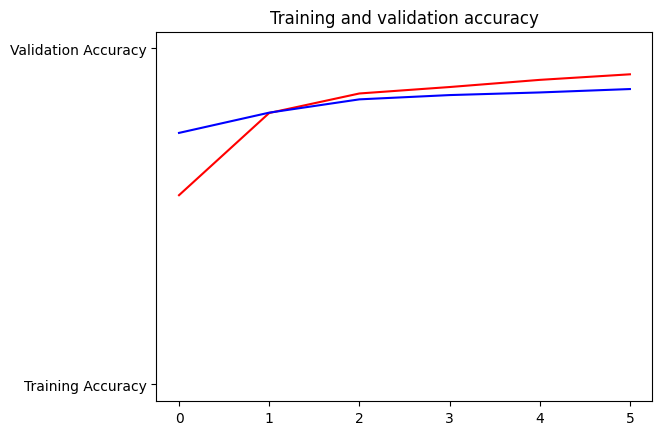

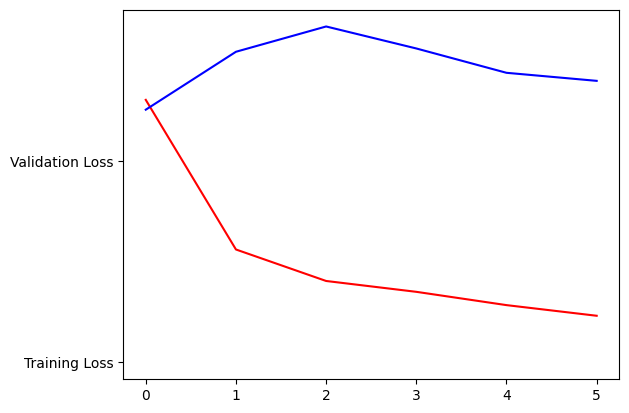

In [7]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

In [ ]:
# Save the entire model to a HDF5 file
model.save("/content/drive/My Drive/Capstone's Project/final_CNN_Model2.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


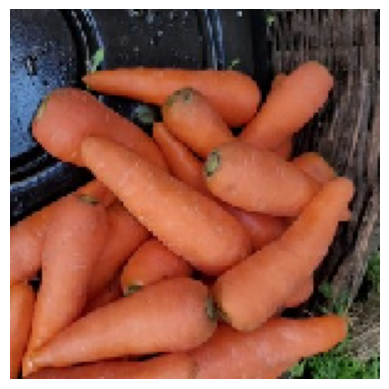

1/1 [==============================] - 0s 80ms/step
['Apple', 'Avocado', 'Banana', 'Blueberry', 'Broccoli', 'Cabbage', 'Carrot', 'Cauliflower', 'Corn', 'Cucumber', 'Eggplant', 'Kiwi', 'Lemon', 'Mango', 'Orange', 'Potato', 'Pumpkin', 'Radish', 'Strawberry', 'Tomato', 'Watermelon']
[[7.6958774e-13 1.7976756e-30 2.7856625e-24 1.5481514e-22 1.0724397e-20
  1.6102753e-17 1.0000000e+00 3.2294930e-30 2.2658812e-13 2.0926183e-20
  4.6372503e-13 4.6816059e-28 3.3212848e-15 5.9423532e-21 5.0398443e-21
  5.8933154e-23 4.4919803e-28 6.2826184e-09 2.3843275e-12 1.4071561e-17
  3.5080519e-10 3.3162982e-29]]
Predicted class: Carrot


In [12]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

model = load_model("/content/drive/My Drive/Capstone's Project/final_CNN_Model.h5")

# Function to preprocess the input image
def preprocess_image(img_path):
    img = load_img(img_path, target_size=(150, 150, 3))
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize pixel values to the range [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Create batch axis
    return img, img_array

# Path to the image you want to predict
image_path = "/content/drive/My Drive/Capstone's Project/Vegetable Images/test/Carrot/1001.jpg"

# Preprocess the image
input_image, input_array = preprocess_image(image_path)

# Visualize the image
plt.imshow(input_image)
plt.axis('off')
plt.show()

# Use the loaded model to make predictions
predictions = model.predict(input_array)

# Assuming you have a list of class labels
# class_labels = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage',
#                 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato',
#                 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}
class_labels = list(train_generator.class_indices.keys())

# Get the index of the predicted class (the one with the highest probability)
predicted_class_index = np.argmax(predictions)

# Get the corresponding class label
predicted_class_label = class_labels[predicted_class_index]
print(class_labels)
print(predictions)
print("Predicted class:", predicted_class_label)


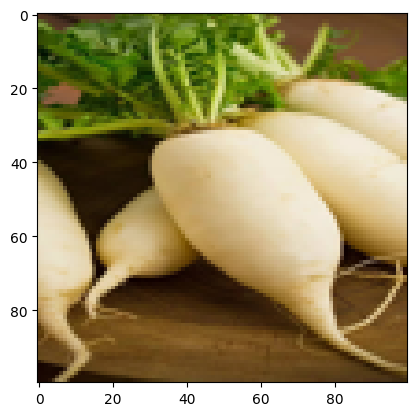

1/1 [==============================] - 0s 141ms/step
[[1.3995448e-12 4.2674422e-13 5.7677385e-06 1.0274482e-12 8.6133268e-06
  1.7233153e-05 1.9442687e-05 1.3720472e-06 1.5619611e-07 3.1029736e-05
  2.2476137e-09 6.8887474e-12 2.6040519e-09 2.2754181e-09 5.8373673e-16
  8.1077728e-11 5.6951621e-10 7.0960814e-01 2.8464687e-01 1.5951514e-11
  5.6613130e-03 5.9051711e-13]]
Predicted class: Radish


In [11]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load your trained model
model = load_model("/content/drive/My Drive/Capstone's Project/final_CNN_Model2.h5")  # Replace with the actual path to your model

# Function to preprocess the input image
def preprocess_image_from_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img = img.convert('RGB')
    img = img.resize((100, 100))  # Adjust the size as needed
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values to the range [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Create batch axis
    return img, img_array

# URL of the image you want to predict
image_url = "https://static.toiimg.com/photo/104311068.cms"

# Preprocess the image from URL
input_image, input_array = preprocess_image_from_url(image_url)

# Visualize the image
plt.imshow(input_image)
plt.axis('on')
plt.show()

# Use the loaded model to make predictions
predictions = model.predict(input_array)

# Assuming you have a list of class labels
# class_labels = {0: 'Bean', 1: 'Bitter_Gourd', 2: 'Bottle_Gourd', 3: 'Brinjal', 4: 'Broccoli', 5: 'Cabbage',
#                 6: 'Capsicum', 7: 'Carrot', 8: 'Cauliflower', 9: 'Cucumber', 10: 'Papaya', 11: 'Potato',
#                 12: 'Pumpkin', 13: 'Radish', 14: 'Tomato'}
class_labels = list(train_generator.class_indices.keys())
# Get the index of the predicted class (the one with the highest probability)
predicted_class_index = np.argmax(predictions)

# Get the corresponding class label
predicted_class_label = class_labels[predicted_class_index]

print(predictions)
print("Predicted class:", predicted_class_label)
